In [6]:
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import sys

In [60]:
files = ('./data/ising-8-12',
         './data/bc-crit-8-21',
         './data/tricritical-7-29')
names = ('Ising Limit',
        '2nd Order Critical Point',
        'Tricritical Point')
expected = (1.75,
           1.75,
           1.85)

In [8]:
# Magnet Susceptibility
def getSusceptibility(filename):
    df = pd.read_csv(filename, sep=' ')
    df['logL'] = np.log(df['L'])
    df['1/L'] = 1/df['L']
    df['logX'] = np.log(df['X'])
    df['SE_logX'] = df['SE'] / df['X']

    invL = np.zeros(df.shape[0]-1)
    gamma = np.zeros(df.shape[0]-1)
    error = np.zeros(df.shape[0]-1)

    for i in range(df.shape[0]-1):
        invL[i] = df['1/L'].iloc[i]
        gamma[i] = (df['logX'].iloc[i+1] - df['logX'].iloc[i]) / (df['logL'].iloc[i+1] - df['logL'].iloc[i])
        error[i] = np.sqrt((df['SE_logX'].iloc[i+1])**2 + (df['SE_logX'].iloc[i])**2) / (df['logL'].iloc[i+1] - df['logL'].iloc[i])
    return (invL, gamma, error)

In [21]:
def getB(filename):
    df = pd.read_csv(filename, sep=' ')
    df['logL'] = np.log(df['L'])
    df['1/L'] = 1/df['L']
    
    invL = np.zeros(df.shape[0]-1)
    b = np.zeros(df.shape[0]-1)
    error = np.zeros(df.shape[0]-1)

    for i in range(df.shape[0]-1):
        invL[i] = df['1/L'].iloc[i]
        b[i] = (df['N'].iloc[i+1] - df['N'].iloc[i]) / (df['logL'].iloc[i+1] - df['logL'].iloc[i])
        error[i] = np.sqrt((df['SE'].iloc[i+1])**2 + (df['SE'].iloc[i])**2) / (df['logL'].iloc[i+1] - df['logL'].iloc[i])
    return (invL, b, error)

In [116]:
def plotFss(ax, invL, observable, error, observable_name, dataset_name, expected):
    maxheight = max(observable) * 1.2
    fit, cov = np.polyfit(invL, observable, 1, w=1/error, cov=True)
    yerr = cov[0][0]
    x = np.linspace(0, 1/6, 100)
    y = np.polyval(fit, x)
    
    # Axes
    ax.vlines((0,), 0, maxheight, linestyle='solid', color='lightgray')
    ax.hlines((expected,), 0, 1/6, linestyle='solid', color='lightgray', label='Expected Answer')

    ax.plot(x, y, linestyle='dashed', linewidth=1, color='black', label='Linear Fit')
    ax.errorbar(invL, observable, yerr=error, linestyle='none', fmt='.', capsize=3, color='black')

    # Final ans
    ax.errorbar([0], [y[0]], [yerr], marker='D', markersize=3, capsize=3, color='dimgray', linestyle='none', label='Numerical Answer')

    ax.set_ylim(0, maxheight)
    ax.set_title(f'{dataset_name}\n{observable_name} = {round(y[0], 5)} {r'$\pm$'} {round(yerr, 5)}') 
    ax.legend(loc='lower right')
    
    return (y[0], yerr)

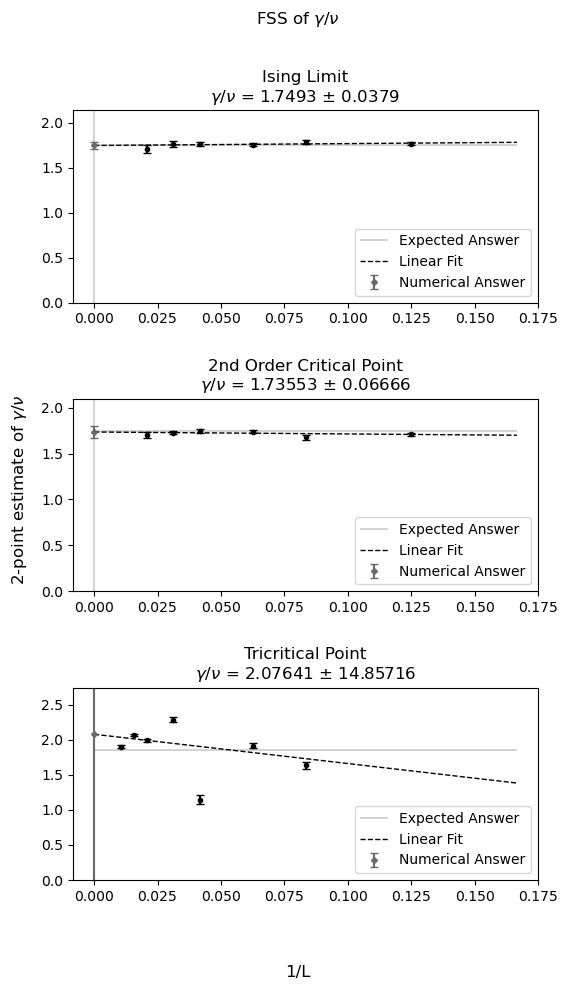

In [117]:
fig, axs = plt.subplots(3, 1, figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    invL, gamma, error = getSusceptibility(files[i] + '/magnet.txt')
    plotFss(axs[i], invL, gamma, error, r'$\gamma/\nu$', names[i], expected[i])

fig.suptitle(f'FSS of {r'$\gamma/\nu$'}')
fig.supylabel(f'2-point estimate of {r'$\gamma/\nu$'}')
fig.supxlabel('1/L')
plt.show()

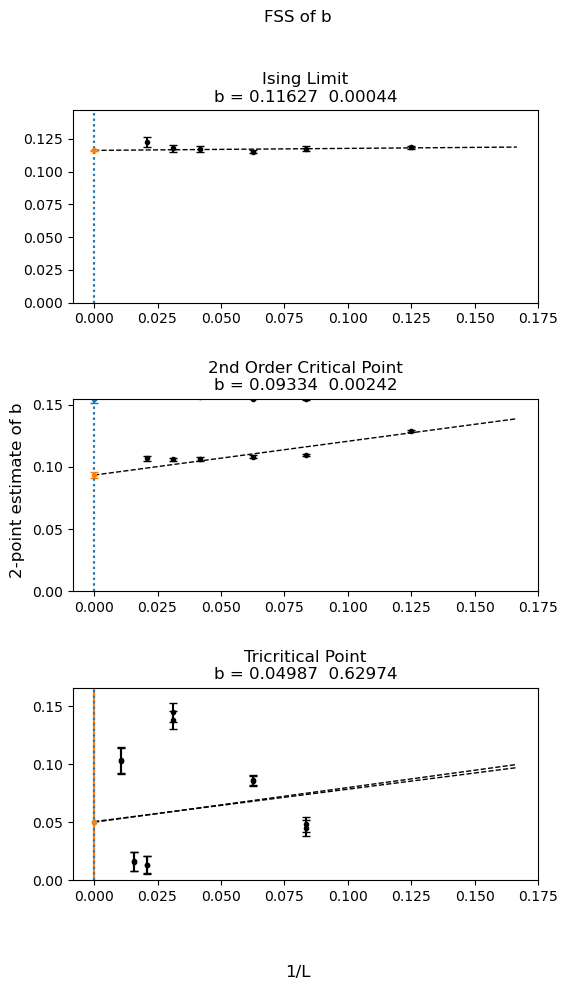

In [32]:
fig, axs = plt.subplots(3, 1, figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    invL, b, error = getB(files[i] + '/gap/fk.txt')
    plotFss(axs[i], invL, b, error, 'b', names[i])
    invL, b, error = getB(files[i] + '/gap/spin.txt')
    plotFss(axs[i], invL, b, error, 'b', names[i])

fig.suptitle(f'FSS of b')
fig.supylabel(f'2-point estimate of b')
fig.supxlabel('1/L')
plt.show()